In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import optimize
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=20)

In [2]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/CFiles/Data/"
data=np.loadtxt(dpath + 'ScreeningABCND1000N1.dat')
data2=np.loadtxt(dpath + 'ScreeningABCND1000N2.dat')
data3=np.loadtxt(dpath + 'ScreeningABCND1000N3.dat')

In [58]:
a=f.readlines()
a=[al[:-10]+'\t'+al[-10:] if al[-10]=='-' else al[:-9]+'\t'+al[-9:] for al in a]
f = open(dpath + 'ScreeningABCND800N1.dat', "w")
f.writelines(a)
f.close()

In [9]:
nr=np.array([-2.5,-1.0,0.0,1.0,2.5])
dataf = []
for nrl in nr:
    ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    ind2=np.where(np.abs(data2[:,0]-nrl)<1e-6)[0]
    ind3=np.where(np.abs(data3[:,0]-nrl)<1e-6)[0]
    dataf.append(np.concatenate((data2[ind2],data[ind],data3[ind3])))

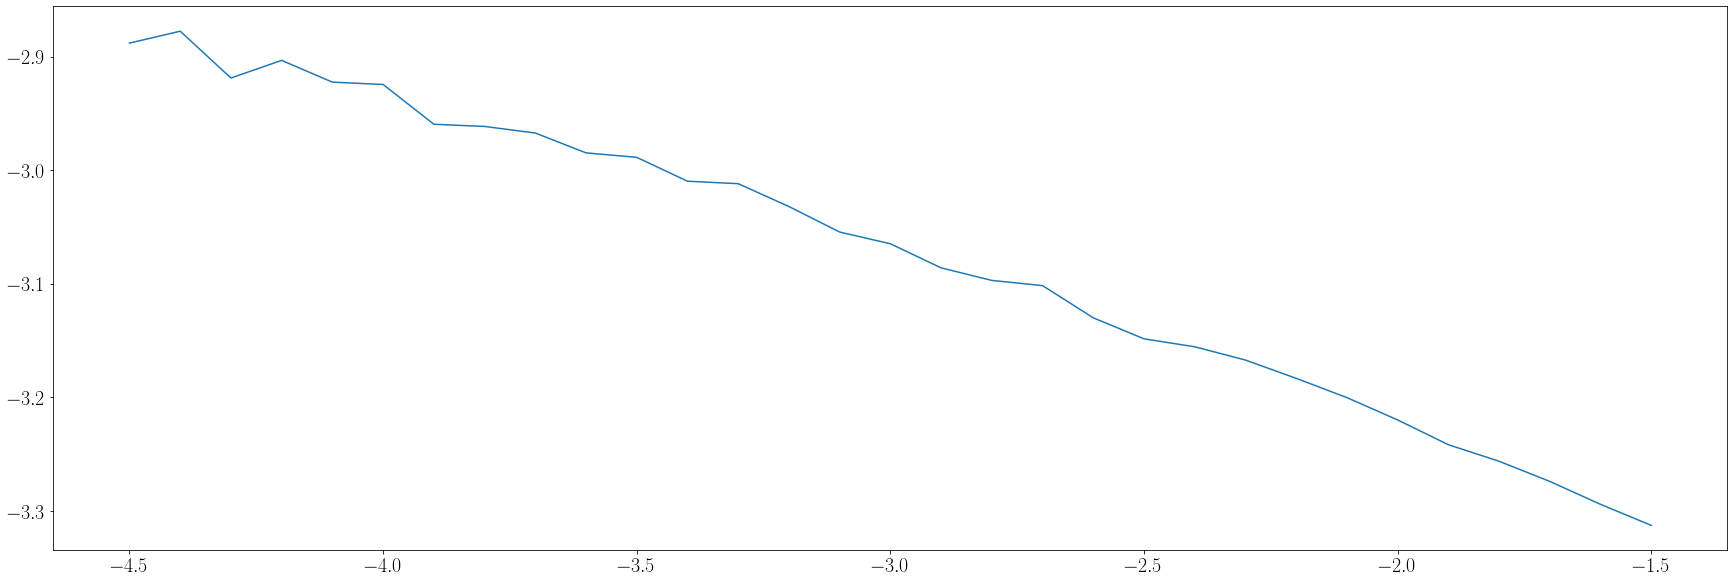

In [139]:
plt.plot(data[ind,0],data[ind,4])

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


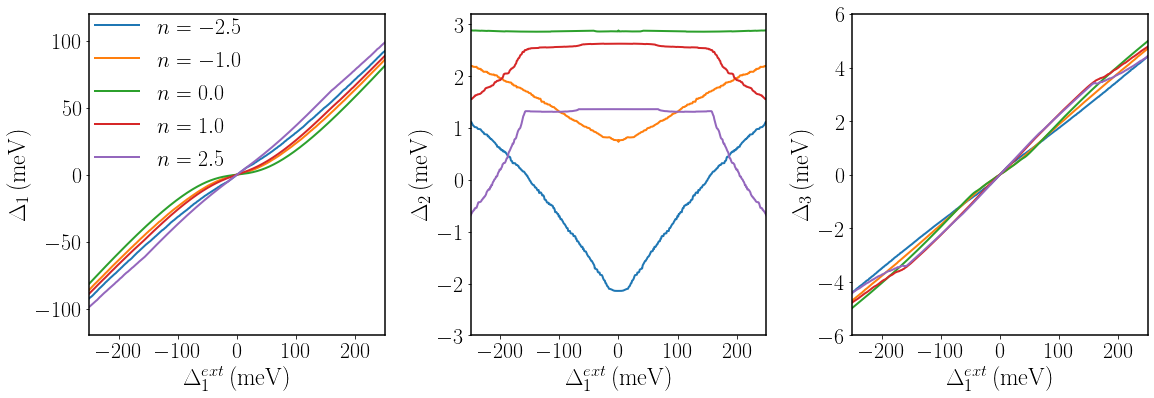

In [23]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=22)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (16.5, 6)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3)

nr=np.array([-2.5,-1.0,0.0,1.0,2.5])
ax0=fig.add_subplot(gs[0,0])
for i in range(len(nr)):
    #ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    #ax0.plot(data[ind,1],data[ind,2], linewidth=2, label=r'$n =%.1f$' %(nrl))
    ax0.plot(dataf[i][:,1],dataf[i][:,2], linewidth=2, label=r'$n =%.1f$' %(nr[i]))
ax0.set_xlim([-250,250])
ax0.set_xticks([-200,-100,0,100,200])
ax0.set_ylim([-120,120])
ax0.set_xlabel(r'$\Delta^{ext}_1\,({\rm meV})$',fontsize=24)
ax0.set_ylabel(r'$\Delta_1\,({\rm meV})$',fontsize=24)
ax0.legend(frameon=False,loc="lower right", bbox_to_anchor=(0.58,0.455))

ax1=fig.add_subplot(gs[0,1])
for i in range(len(nr)):
    #ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    #ax1.plot(data[ind,1],data[ind,3], linewidth=2, label=r'$n =%.1f\times10^{12}\,{\rm cm}^{-2}$' %(nrl))
    ax1.plot(dataf[i][:,1],dataf[i][:,3], linewidth=2, label=r'$n =%.1f$' %(nr[i]))
ax1.set_xlim([-250,250])
ax1.set_xticks([-200,-100,0,100,200])
ax1.set_ylim([-3,3.2])
ax1.set_xlabel(r'$\Delta^{ext}_1\,({\rm meV})$',fontsize=24)
ax1.set_ylabel(r'$\Delta_2\,({\rm meV})$',fontsize=24)
#ax1.legend()

ax2=fig.add_subplot(gs[0,2])
for i in range(len(nr)):
    #ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    #ax2.plot(data[ind,1],data[ind,4], linewidth=2, label=r'$n =%.1f\times10^{12}\,{\rm cm}^{-2}$' %(nrl))
    ax2.plot(dataf[i][:,1],dataf[i][:,4], linewidth=2, label=r'$n =%.1f$' %(nr[i]))
ax2.set_xlim([-250,250])
ax2.set_xticks([-200,-100,0,100,200])
ax2.set_ylim([-6,6])
ax2.set_xlabel(r'$\Delta^{ext}_1\,({\rm meV})$',fontsize=24)
ax2.set_ylabel(r'$\Delta_3\,({\rm meV})$',fontsize=24)
#ax2.legend()
plt.tight_layout()
plt.savefig('ScreeningDepDelta.pdf')

(-250.0, -100.0)

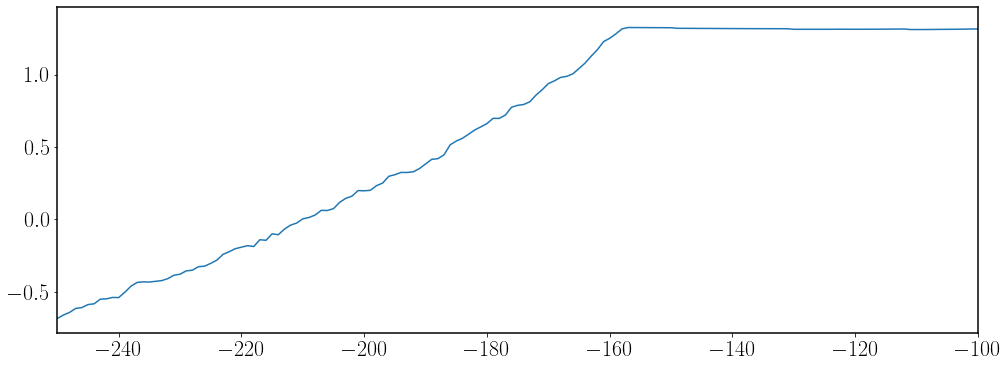

In [22]:
plt.plot(dataf[-1][:,1],dataf[-1][:,3])
plt.xlim([-250,-100])

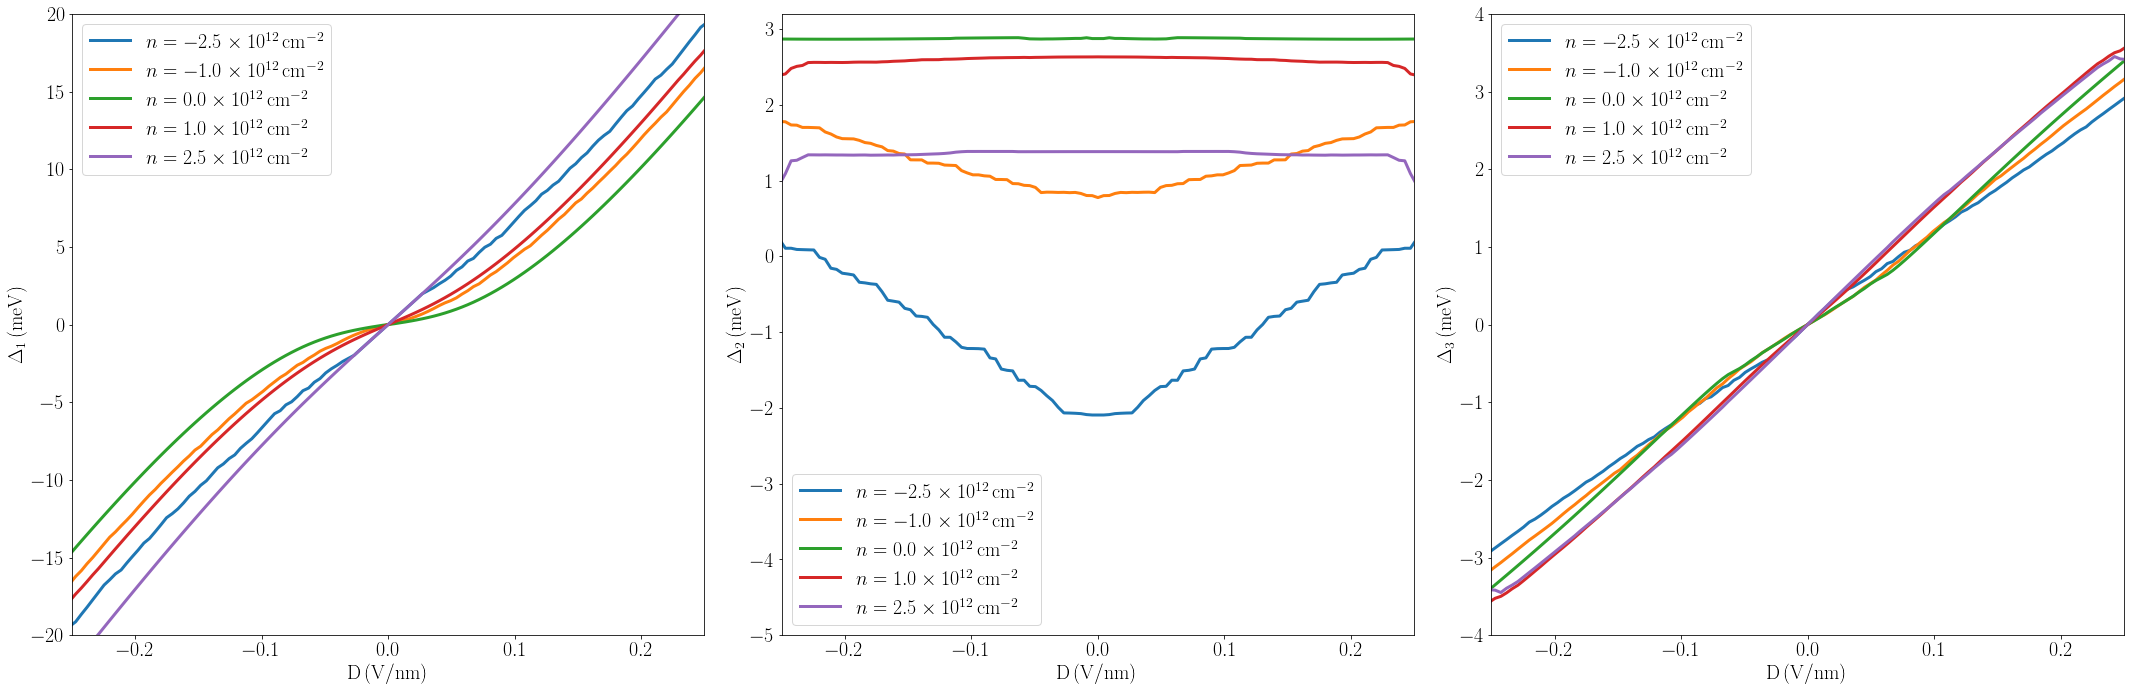

In [13]:
ml.rcParams['figure.figsize'] = (30.0, 10.0)
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)
nr=np.array([-2.5,-1.0,0.0,1.0,2.5])
d=0.334
mult=6/(4*d*1000)
for nrl in nr:
    ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    ax0.plot(mult*data[ind,1],data[ind,2], linewidth=3, label=r'$n =%.1f\times10^{12}\,{\rm cm}^{-2}$' %(nrl))
ax0.set_xlim([-0.25,0.25])
ax0.set_ylim([-20,20])
ax0.set_xlabel(r'$\mathrm{D\,(V/nm)}$')
ax0.set_ylabel(r'$\Delta_1\,({\rm meV})$')
ax0.legend()
for nrl in nr:
    ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    ax1.plot(mult*data[ind,1],data[ind,3], linewidth=3, label=r'$n =%.1f\times10^{12}\,{\rm cm}^{-2}$' %(nrl))
ax1.set_xlim([-0.25,0.25])
ax1.set_ylim([-5,3.2])
ax1.set_xlabel(r'$\mathrm{D\,(V/nm)}$')
ax1.set_ylabel(r'$\Delta_2\,({\rm meV})$')
ax1.legend()

for nrl in nr:
    ind=np.where(np.abs(data[:,0]-nrl)<1e-6)[0]
    ax2.plot(mult*data[ind,1],data[ind,4], linewidth=3, label=r'$n =%.1f\times10^{12}\,{\rm cm}^{-2}$' %(nrl))
ax2.set_xlim([-0.25,0.25])
ax2.set_ylim([-4,4])
ax2.set_xlabel(r'$\mathrm{D\,(V/nm)}$')
ax2.set_ylabel(r'$\Delta_3\,({\rm meV})$')
ax2.legend()
plt.tight_layout()
plt.savefig('ScreeningDepD.pdf')

In [8]:
1000*4*0.334/(6)

222.66666666666666

In [1]:
0.5*4*334/2

334.0

In [3]:
0.5*0.334/4

0.04175

In [24]:
0.5*9200*0.025

115.0